In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import xgboost as xgb
import warnings 
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [94]:
train.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,5,64,0,4990,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
1,0.672619,2,37,11,27003,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
2,0.841110,2,38,15,4076,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
3,0.900277,11,43,16,21622,1,3,3,2,0,...,1,1,1,1,1,1,1,1,2,0
4,0.596403,11,63,17,34738,2,0,4,2,8,...,0,1,1,1,0,1,1,1,2,0


In [5]:
test.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
1,ID58594,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,ID58595,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,ID58596,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
4,ID58597,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0


In [6]:
for i in train.columns:
    print(i)
    print(train[i].unique())

policy_id
['ID00001' 'ID00002' 'ID00003' ... 'ID58590' 'ID58591' 'ID58592']
policy_tenure
[0.51587359 0.67261851 0.84111026 ... 1.16227251 1.2363069  0.12442893]
age_of_car
[0.05 0.02 0.11 0.07 0.16 0.14 0.04 0.01 0.12 0.03 0.1  0.09 0.   0.08
 0.15 0.13 0.39 0.17 0.06 0.18 0.2  0.29 0.19 0.38 0.22 0.23 0.26 0.21
 0.27 0.28 0.3  0.25 0.31 0.33 0.35 0.32 0.24 0.37 1.   0.42 0.36 0.45
 0.49 0.46 0.34 0.82 0.44 0.62 0.81]
age_of_policyholder
[0.64423077 0.375      0.38461538 0.43269231 0.63461538 0.51923077
 0.40384615 0.42307692 0.29807692 0.44230769 0.59615385 0.48076923
 0.30769231 0.57692308 0.60576923 0.47115385 0.5        0.39423077
 0.61538462 0.31730769 0.32692308 0.49038462 0.46153846 0.92307692
 0.69230769 0.45192308 0.41346154 0.68269231 0.36538462 0.35576923
 0.50961538 0.53846154 0.67307692 0.34615385 0.54807692 0.28846154
 0.55769231 0.75961538 0.33653846 0.74038462 0.66346154 0.625
 0.52884615 0.58653846 0.65384615 0.73076923 0.56730769 0.70192308
 0.80769231 0.79807692 0.8

In [7]:
train["age_of_policyholder"]=(train["age_of_policyholder"]*100).astype(int)

In [8]:
train["age_of_car"]=(train["age_of_car"]*100).astype(int)

In [9]:
train=train[train["age_of_car"]<21]

In [10]:
test["age_of_policyholder"]=(test["age_of_policyholder"]*100).astype(int)

In [11]:
test["age_of_car"]=(test["age_of_car"]*100).astype(int)

In [12]:
test=test[test["age_of_car"]<21]

In [13]:
train.shape

(57848, 44)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57848 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         57848 non-null  object 
 1   policy_tenure                     57848 non-null  float64
 2   age_of_car                        57848 non-null  int32  
 3   age_of_policyholder               57848 non-null  int32  
 4   area_cluster                      57848 non-null  object 
 5   population_density                57848 non-null  int64  
 6   make                              57848 non-null  int64  
 7   segment                           57848 non-null  object 
 8   model                             57848 non-null  object 
 9   fuel_type                         57848 non-null  object 
 10  max_torque                        57848 non-null  object 
 11  max_power                         57848 non-null  object 
 12  engi

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38569 entries, 0 to 39062
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         38569 non-null  object 
 1   policy_tenure                     38569 non-null  float64
 2   age_of_car                        38569 non-null  int32  
 3   age_of_policyholder               38569 non-null  int32  
 4   area_cluster                      38569 non-null  object 
 5   population_density                38569 non-null  int64  
 6   make                              38569 non-null  int64  
 7   segment                           38569 non-null  object 
 8   model                             38569 non-null  object 
 9   fuel_type                         38569 non-null  object 
 10  max_torque                        38569 non-null  object 
 11  max_power                         38569 non-null  object 
 12  engi

In [16]:
train.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [17]:
test.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [18]:
test.duplicated().any()

False

In [19]:
train.duplicated().any()

False

In [20]:
train.drop("policy_id",axis=1,inplace=True)

In [21]:



test.drop("policy_id",axis=1,inplace=True)

In [22]:
train.head(10)

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,5,64,C1,4990,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
1,0.672619,2,37,C2,27003,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
2,0.841110,2,38,C3,4076,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
3,0.900277,11,43,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.596403,11,63,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
5,1.018709,7,51,C6,13051,3,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
6,0.097992,16,40,C7,6112,4,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
7,0.509085,14,42,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
8,0.282394,7,29,C7,6112,3,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
9,0.566255,4,44,C9,17804,1,B2,M7,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,0


In [23]:
train["is_claim"].value_counts()

0    54132
1     3716
Name: is_claim, dtype: int64

In [24]:
train["max_torque"].unique()

array(['60Nm@3500rpm', '113Nm@4400rpm', '91Nm@4250rpm', '250Nm@2750rpm',
       '200Nm@3000rpm', '82.1Nm@3400rpm', '200Nm@1750rpm', '85Nm@3000rpm',
       '170Nm@4000rpm'], dtype=object)

In [25]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
policy_tenure,57848.0,0.609683,0.413958,0.002735,0.208877,0.571518,1.037998,1.396641
age_of_car,57848.0,6.706368,5.244848,0.000000,2.000000,6.000000,11.000000,20.000000
age_of_policyholder,57848.0,46.409470,12.311192,28.000000,36.000000,45.000000,54.000000,100.000000
population_density,57848.0,18845.943611,17663.634417,290.000000,6112.000000,8794.000000,27003.000000,73430.000000
make,57848.0,1.757900,1.135460,1.000000,1.000000,1.000000,3.000000,5.000000
airbags,57848.0,3.128976,1.828747,1.000000,2.000000,2.000000,6.000000,6.000000
displacement,57848.0,1160.319078,266.560272,796.000000,796.000000,1197.000000,1493.000000,1498.000000
cylinder,57848.0,3.623980,0.484389,3.000000,3.000000,4.000000,4.000000,4.000000
gear_box,57848.0,5.243293,0.429074,5.000000,5.000000,5.000000,5.000000,6.000000
turning_radius,57848.0,4.851305,0.227894,4.500000,4.600000,4.800000,5.000000,5.200000


<AxesSubplot:xlabel='is_claim', ylabel='count'>

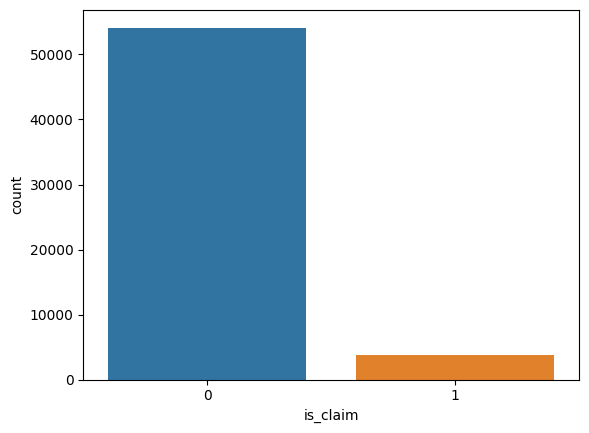

In [26]:

sns.countplot(train.is_claim)

According to data claim rate is low 
target variable is imbalanced

<AxesSubplot:xlabel='is_brake_assist', ylabel='count'>

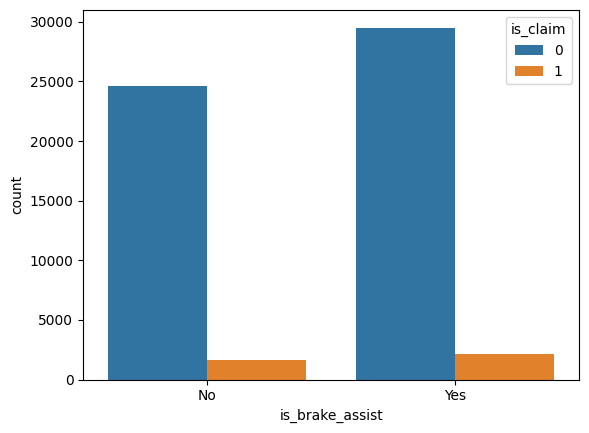

In [27]:
sns.countplot(data=train,x="is_brake_assist",hue=train["is_claim"])

maximum no of car has brake assistance and no of claim of brake assistance car is max. 

<AxesSubplot:xlabel='is_ecw', ylabel='count'>

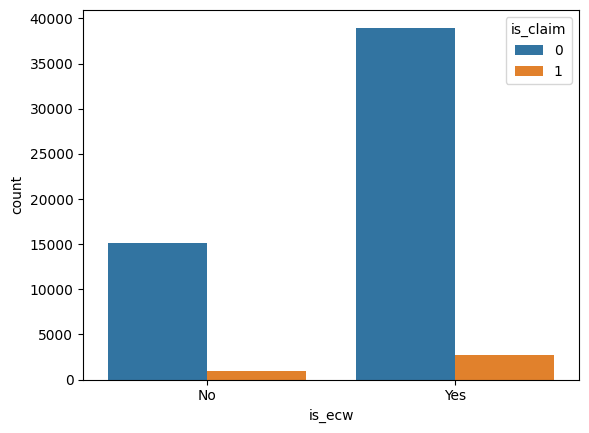

In [28]:
sns.countplot(train.is_ecw,hue=train["is_claim"])

#policy_holders having E-cleaningworking has more claims then not having E-cleaning works 

<AxesSubplot:xlabel='is_power_steering', ylabel='count'>

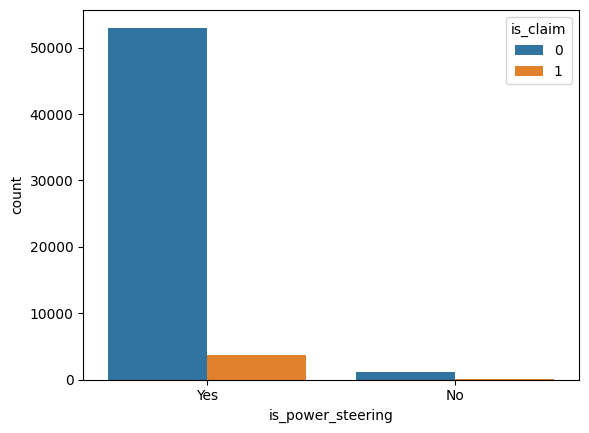

In [29]:

sns.countplot(train.is_power_steering,hue=train["is_claim"])

In [30]:
corr=train.corr()

<AxesSubplot:xlabel='segment', ylabel='count'>

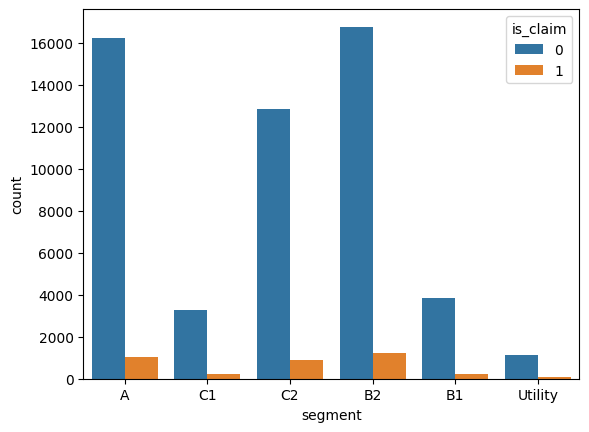

In [31]:
sns.countplot(train.segment,hue=train["is_claim"])

In [32]:
# B2 segment car are more than 17000
#utility segment has claimed less
#B2 segment has claimed more compare to others

<AxesSubplot:xlabel='max_torque', ylabel='count'>

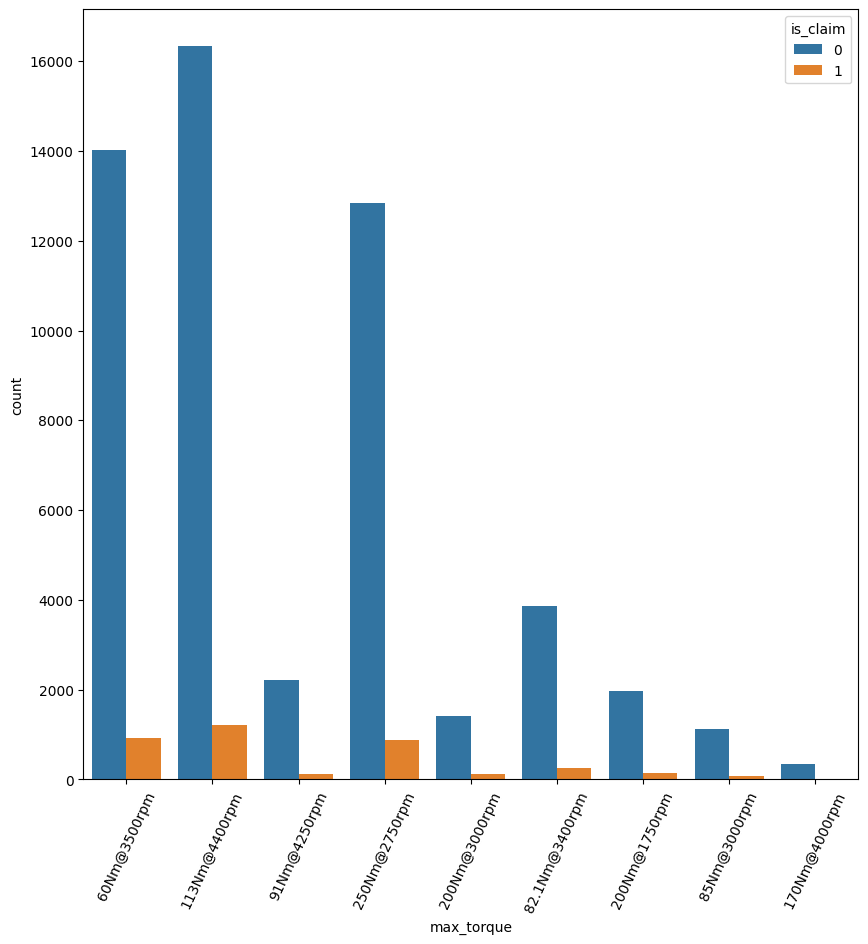

In [33]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=65)
sns.countplot(train.max_torque,hue=train["is_claim"])

In [34]:
# max torque 170nm with 4000rpm has no claim 
# max torque 113nm with 4400rpm has highest claim 

<AxesSubplot:xlabel='cylinder', ylabel='count'>

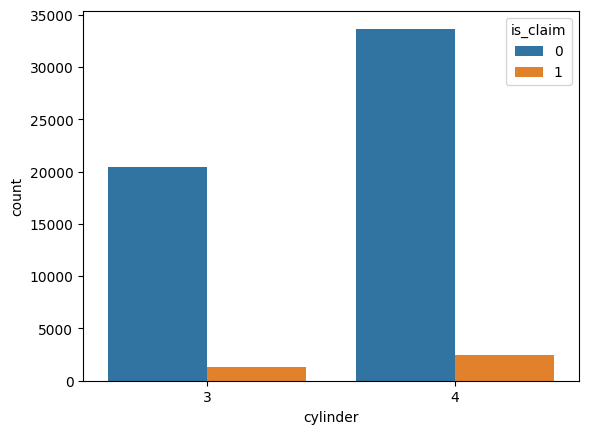

In [35]:
sns.countplot(train.cylinder,hue=train["is_claim"])

In [36]:
# 4 cylinder vehicle has highest claim compare to vehicle with 3 cylinder 

<AxesSubplot:xlabel='is_speed_alert', ylabel='count'>

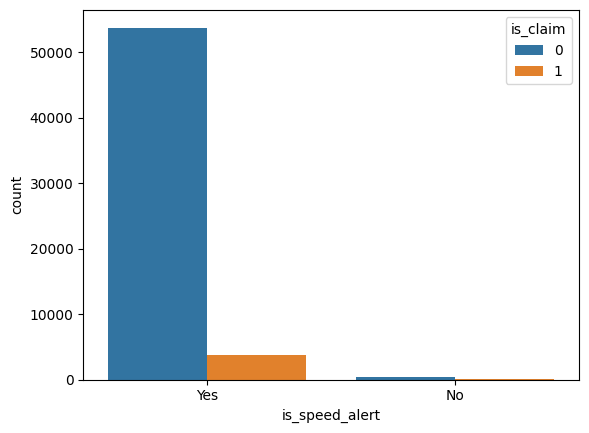

In [37]:
sns.countplot(train.is_speed_alert,hue=train["is_claim"])

In [38]:
# most of the data has speed alert so by default vehicle with speed alert has high claim


<AxesSubplot:xlabel='fuel_type', ylabel='count'>

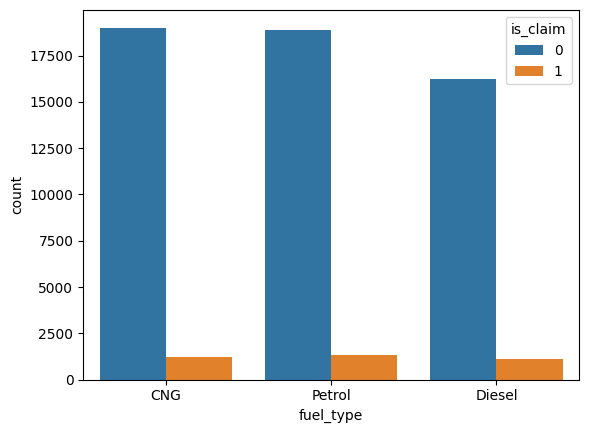

In [39]:
sns.countplot(train.fuel_type,hue=train["is_claim"])

In [40]:
# Diesel vehicle are less has compare to cng and petrol vehicle  
# each type vehicle category has  approax same claim rate

In [41]:
from sklearn.preprocessing import LabelEncoder 

In [42]:
le=LabelEncoder()

In [43]:
co_cols=train.select_dtypes(include='O').columns
co_cols

Index(['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque',
       'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering',
       'is_tpms', 'is_parking_sensors', 'is_parking_camera',
       'rear_brakes_type', 'transmission_type', 'steering_type',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

In [44]:
for i in co_cols:
    train[i]=le.fit_transform(train[i])

In [45]:
train.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,5,64,0,4990,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
1,0.672619,2,37,11,27003,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
2,0.841110,2,38,15,4076,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
3,0.900277,11,43,16,21622,1,3,3,2,0,...,1,1,1,1,1,1,1,1,2,0
4,0.596403,11,63,17,34738,2,0,4,2,8,...,0,1,1,1,0,1,1,1,2,0


In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
sc=StandardScaler()

In [48]:
from sklearn.model_selection import train_test_split 

In [49]:
X=train.drop("is_claim",axis=1)
y=train["is_claim"]

In [50]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy='auto')
X_sm,y_sm=sm.fit_resample(X,y)

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.20,random_state=123)

In [52]:
X_train.shape

(86611, 42)

In [53]:
y_train.shape

(86611,)

In [54]:
X_test.shape

(21653, 42)

In [55]:
y_test.shape

(21653,)

In [56]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [58]:
lr=LogisticRegression()
kn=KNeighborsClassifier(n_neighbors=5)
rfc=RandomForestClassifier()
dt=DecisionTreeClassifier()
abc=AdaBoostClassifier()
xg=XGBClassifier()



In [59]:
from sklearn.metrics import classification_report
def my_model(model):
    model.fit(X_train,y_train)
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)
    print("train data")
    print(classification_report(y_train,y_pred_train))
    print("test data")
    print(classification_report(y_test,y_pred_test))
    return model 

In [60]:
 my_model(lr)

train data
              precision    recall  f1-score   support

           0       0.59      0.59      0.59     43279
           1       0.59      0.60      0.60     43332

    accuracy                           0.59     86611
   macro avg       0.59      0.59      0.59     86611
weighted avg       0.59      0.59      0.59     86611

test data
              precision    recall  f1-score   support

           0       0.60      0.59      0.60     10853
           1       0.60      0.60      0.60     10800

    accuracy                           0.60     21653
   macro avg       0.60      0.60      0.60     21653
weighted avg       0.60      0.60      0.60     21653



LogisticRegression()

In [61]:
my_model(kn)

train data
              precision    recall  f1-score   support

           0       0.93      0.78      0.85     43279
           1       0.81      0.94      0.87     43332

    accuracy                           0.86     86611
   macro avg       0.87      0.86      0.86     86611
weighted avg       0.87      0.86      0.86     86611

test data
              precision    recall  f1-score   support

           0       0.87      0.70      0.78     10853
           1       0.75      0.90      0.82     10800

    accuracy                           0.80     21653
   macro avg       0.81      0.80      0.80     21653
weighted avg       0.81      0.80      0.80     21653



KNeighborsClassifier()

In [62]:
my_model(rfc)

train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43279
           1       1.00      1.00      1.00     43332

    accuracy                           1.00     86611
   macro avg       1.00      1.00      1.00     86611
weighted avg       1.00      1.00      1.00     86611

test data
              precision    recall  f1-score   support

           0       0.88      0.74      0.81     10853
           1       0.78      0.90      0.83     10800

    accuracy                           0.82     21653
   macro avg       0.83      0.82      0.82     21653
weighted avg       0.83      0.82      0.82     21653



RandomForestClassifier()

In [63]:
my_model(abc)

train data
              precision    recall  f1-score   support

           0       0.70      0.56      0.62     43279
           1       0.64      0.76      0.69     43332

    accuracy                           0.66     86611
   macro avg       0.67      0.66      0.66     86611
weighted avg       0.67      0.66      0.66     86611

test data
              precision    recall  f1-score   support

           0       0.70      0.57      0.63     10853
           1       0.64      0.75      0.69     10800

    accuracy                           0.66     21653
   macro avg       0.67      0.66      0.66     21653
weighted avg       0.67      0.66      0.66     21653



AdaBoostClassifier()

In [64]:
my_model(xg)

train data
              precision    recall  f1-score   support

           0       0.81      0.70      0.75     43279
           1       0.73      0.83      0.78     43332

    accuracy                           0.77     86611
   macro avg       0.77      0.77      0.76     86611
weighted avg       0.77      0.77      0.76     86611

test data
              precision    recall  f1-score   support

           0       0.78      0.61      0.68     10853
           1       0.68      0.83      0.75     10800

    accuracy                           0.72     21653
   macro avg       0.73      0.72      0.71     21653
weighted avg       0.73      0.72      0.71     21653



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [65]:
my_model(dt)

train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43279
           1       1.00      1.00      1.00     43332

    accuracy                           1.00     86611
   macro avg       1.00      1.00      1.00     86611
weighted avg       1.00      1.00      1.00     86611

test data
              precision    recall  f1-score   support

           0       0.74      0.68      0.71     10853
           1       0.70      0.76      0.73     10800

    accuracy                           0.72     21653
   macro avg       0.72      0.72      0.72     21653
weighted avg       0.72      0.72      0.72     21653



DecisionTreeClassifier()

In [66]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [67]:
from sklearn.model_selection import GridSearchCV

In [69]:
clf=GridSearchCV(xg,param_grid=params,scoring='accuracy',n_jobs=-1,cv=5)
clf.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012...
                                     max_delta_step=0, max_depth=6,
                                     max_leaves=0, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5], 'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 5, 10],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy')

In [70]:
my_model(clf)

train data
              precision    recall  f1-score   support

           0       0.78      0.67      0.72     43279
           1       0.71      0.81      0.76     43332

    accuracy                           0.74     86611
   macro avg       0.74      0.74      0.74     86611
weighted avg       0.74      0.74      0.74     86611

test data
              precision    recall  f1-score   support

           0       0.77      0.57      0.66     10853
           1       0.66      0.83      0.73     10800

    accuracy                           0.70     21653
   macro avg       0.72      0.70      0.69     21653
weighted avg       0.72      0.70      0.69     21653



GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012...
                                     max_delta_step=0, max_depth=6,
                                     max_leaves=0, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5], 'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 5, 10],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy')

In [72]:
data={"models":["LogisticRegression","KNeighborsClassifier","DecisionTreeClassifier","RandomForestClassifier","AdaBoostClassifier","XGBClassifier","grid_search_cv_xg"],
     "Train_accuracy":[59,86,100,66,76,100,74],
      "Test_accuracy":[59,80,84,66,72,72,70]
     }
df=pd.DataFrame(data)

In [73]:
df

,models,Train_accuracy,Test_accuracy
0,LogisticRegression,59,59
1,KNeighborsClassifier,86,80
2,DecisionTreeClassifier,100,84
3,RandomForestClassifier,66,66
4,AdaBoostClassifier,76,72
5,XGBClassifier,100,72
6,grid_search_cv_xg,74,70


<AxesSubplot:xlabel='Train_accuracy', ylabel='Test_accuracy'>

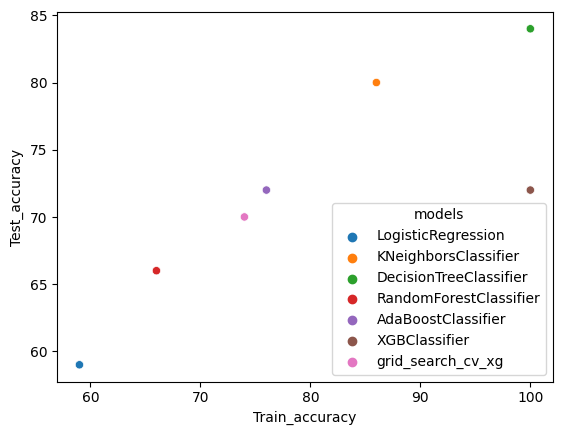

In [74]:
sns.scatterplot(x="Train_accuracy",y="Test_accuracy",hue=df["models"],data=df)

prediction on testdata


In [78]:
x_test=test
x_test.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,0.341732,0,58,C3,4076,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,No,Yes,No,No,No,Yes,0
1,0.307241,13,44,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,0.327924,12,45,C8,8794,2,A,M3,Petrol,91Nm@4250rpm,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,0.782654,1,46,C5,34738,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,No,Yes,No,No,No,Yes,0
4,1.233404,2,63,C5,34738,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,No,Yes,No,No,No,Yes,0


In [80]:
co_cols=test.select_dtypes(include='O').columns
co_cols

Index(['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque',
       'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering',
       'is_tpms', 'is_parking_sensors', 'is_parking_camera',
       'rear_brakes_type', 'transmission_type', 'steering_type',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

In [81]:
for i in co_cols:
    test[i]=le.fit_transform(test[i])

In [82]:
pred=clf.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [83]:
df1=pd.DataFrame(pred)

In [93]:
df1

,0
0,0
1,0
2,0
3,0
4,0
...,...
38564,0
38565,0
38566,0
38567,0
